In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [42]:
# Import Dataset
df = pd.read_csv("adult_income.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
df['income'].unique()

<StringArray>
['<=50K', '>50K', '<=50K.', '>50K.']
Length: 4, dtype: str

In [51]:
# Clean Dataset Income Column
df['income'] = df['income'].str.replace('.', '', regex=False)
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [52]:
df['education'].unique()
df['education'].value_counts()


education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [53]:
# Collapase Categories for easier interpretation 
education_map = {
    'Preschool': 'Before HS',
    '1st-4th': 'Before HS',
    '5th-6th': 'Before HS',
    '7th-8th': 'Before HS',
    '9th': 'Before HS',
    '10th': 'Before HS',
    '11th': 'Before HS',

    '12th': 'High School',
    'HS-grad': 'High School',

    'Some-college': 'Some College',
    'Assoc-acdm': 'Some College',
    'Assoc-voc': 'Some College',

    'Bachelors': 'Bachelors',
    'Masters': 'Masters',
    'Doctorate': 'Doctorate',
    'Prof-school': 'Professional'
}

df['education_grouped'] = df['education'].map(education_map)


In [54]:
df['education_grouped'].value_counts()


education_grouped
High School     16441
Some College    14540
Bachelors        8025
Before HS        5751
Masters          2657
Professional      834
Doctorate         594
Name: count, dtype: int64

In [55]:
# Basic Statistical Analysis
#
# Chi Square Tests 
# Question: Does income category differ by education attainment?
# Columns: Outcome (Income), Rows: Explanatory (Education groups)
contingency = pd.crosstab(
    df['education_grouped'],
    df['income']
)

contingency


income,<=50K,>50K
education_grouped,,
Bachelors,4712,3313
Before HS,5433,318
Doctorate,163,431
High School,13890,2551
Masters,1198,1459
Professional,217,617
Some College,11542,2998


In [56]:
# Run Chi Square Test of independence
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4e}")

Chi-square statistic: 6444.92
Degrees of freedom: 6
P-value: 0.0000e+00


In [57]:
df['marital-status'].unique()

<StringArray>
[        'Never-married',    'Married-civ-spouse',              'Divorced',
 'Married-spouse-absent',             'Separated',     'Married-AF-spouse',
               'Widowed']
Length: 7, dtype: str

In [58]:
# Collapse groups for easier interpretation 
marital_map = {
    'Never-married': 'Never Married',

    'Married-civ-spouse': 'Married',
    'Married-AF-spouse': 'Married',

    'Divorced': 'Previously Married',
    'Separated': 'Previously Married',
    'Widowed': 'Previously Married',
    'Married-spouse-absent': 'Previously Married'
}

df['marital_grouped'] = df['marital-status'].map(marital_map)
df['marital_grouped'].value_counts()

marital_grouped
Married               22416
Never Married         16117
Previously Married    10309
Name: count, dtype: int64

In [59]:
contingency_M_I = pd.crosstab(
    df['marital_grouped'],
    df['income']
)

contingency_M_I

income,<=50K,>50K
marital_grouped,,
Married,12418,9998
Never Married,15384,733
Previously Married,9353,956


In [60]:
# Run Chi Square Test of independence
chi2, p, dof, expected = chi2_contingency(contingency_M_I)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4e}")

Chi-square statistic: 9805.30
Degrees of freedom: 2
P-value: 0.0000e+00


In [64]:
# Finds proportion of each group
prop_table = contingency_M_I.div(contingency_M_I.sum(axis=1), axis=0)
prop_table

income,<=50K,>50K
marital_grouped,,
Married,0.553979,0.446021
Never Married,0.954520,0.045480
Previously Married,0.907265,0.092735


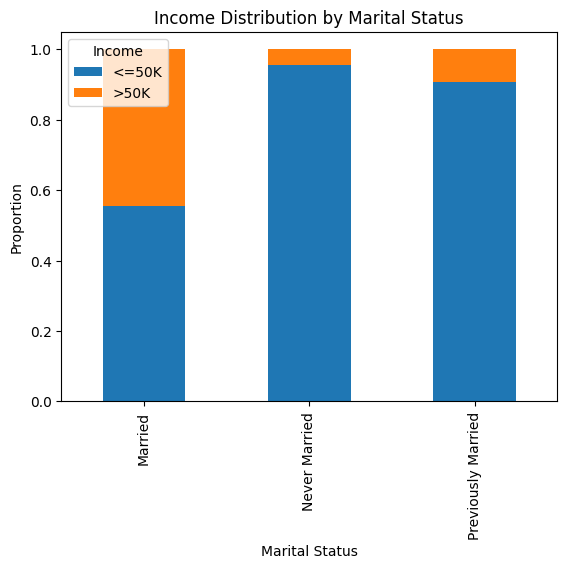

In [70]:
prop_table.plot(kind='bar', stacked=True)

plt.ylabel('Proportion')
plt.xlabel('Marital Status')
plt.title('Income Distribution by Marital Status')
plt.legend(title='Income')
plt.show()


In [74]:
df['native-country'].unique()
df['native-country'].value_counts()


native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

# What kind of machine learning models could we work on?
classification 